# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [2]:
brcan_dt=pd.read_csv(r'C:\Users\Admin\Desktop\Python\December_Internal_lab\breast-cancer-wisconsin-data.csv')

In [3]:
brcan_dt.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [4]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [5]:
brcan_dt.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [6]:
brcan_dt.shape

(699, 11)

In [7]:
brcan_dt.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [8]:
brcan_dt['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [9]:
brcan_dt.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [10]:
brcan_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


Observation:

Bare Nuclei is of the type object. It must contain non-numeric data.

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [11]:
# We could see "?" values in column, this should be removed from data set
brcan_dt['Bare Nuclei'].value_counts()
# Check for missing value in any other column

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [12]:
brcan_dt.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [13]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


The column bare nuclei has 16 entries with '?'

In [14]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [15]:
brcan_dt.replace('?',brcan_dt['Bare Nuclei'].mode().loc[0],inplace=True)

In [16]:
brcan_dt['Bare Nuclei'].value_counts()

1     418
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [17]:
brcan_dt['Bare Nuclei']=brcan_dt['Bare Nuclei'].astype(int)

In [18]:
brcan_dt.dtypes

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int32
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

In [19]:
brcan_dt.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,699.0,3.486409e+00,3.621929,1.0,1.0,1.0,5.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0


In [20]:
brcan_dt.duplicated().value_counts()

False    690
True       9
dtype: int64

In [21]:
brcan_dt=brcan_dt.drop_duplicates()

In [22]:
brcan_dt.shape

(690, 11)

In [23]:
brcan_dt.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [24]:
brcan_dt.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,690.0,1.073826e+06,619609.221048,61634.0,874484.5,1171752.5,1238450.5,13454352.0
ClumpThickness,690.0,4.428986e+00,2.817378,1.0,2.0,4.0,6.0,10.0
Cell Size,690.0,3.133333e+00,3.042451,1.0,1.0,1.0,5.0,10.0
Cell Shape,690.0,3.204348e+00,2.960844,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,690.0,2.827536e+00,2.867787,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,690.0,3.213043e+00,2.200964,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,690.0,3.482609e+00,3.617064,1.0,1.0,1.0,5.0,10.0
Normal Nucleoli,690.0,3.436232e+00,2.444060,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,690.0,2.885507e+00,3.067682,1.0,1.0,1.0,4.0,10.0
Mitoses,690.0,1.594203e+00,1.724230,1.0,1.0,1.0,1.0,10.0


In [25]:
brcan_dt.mode()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1182404,1,1,1,1,2,1,2,1,1,2


In [26]:
brcan_dt.median()

ID                             1171752.5
ClumpThickness                       4.0
Cell Size                            1.0
Cell Shape                           1.0
Marginal Adhesion                    1.0
Single Epithelial Cell Size          2.0
Bare Nuclei                          1.0
Normal Nucleoli                      3.0
Bland Chromatin                      1.0
Mitoses                              1.0
Class                                2.0
dtype: float64

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [27]:
# Check for correlation of variable

In [28]:
brcan_dt.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.059592,-0.043856,-0.042803,-0.066771,-0.048102,-0.091832,-0.059802,-0.054517,-0.036286,-0.080084
ClumpThickness,-0.059592,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196,0.716812
Cell Size,-0.043856,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918,0.817586
Cell Shape,-0.042803,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435,0.817551
Marginal Adhesion,-0.066771,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008,0.701175
Single Epithelial Cell Size,-0.048102,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517,0.681063
Bare Nuclei,-0.091832,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823,0.816655
Normal Nucleoli,-0.059802,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769,0.756736
Bland Chromatin,-0.054517,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490,0.715363
Mitoses,-0.036286,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000,0.423947


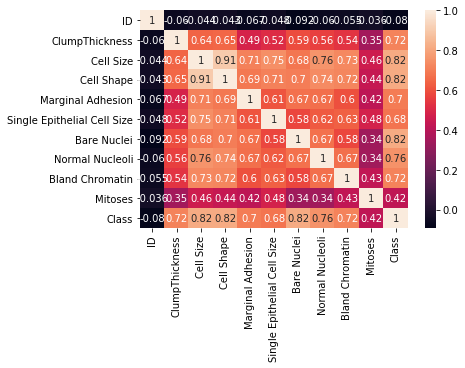

In [29]:
sns.heatmap(brcan_dt.corr(),annot=True)

Cell Size and Cell Shape is highly correlated.

In [30]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [31]:
#Let us check for pair plots

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


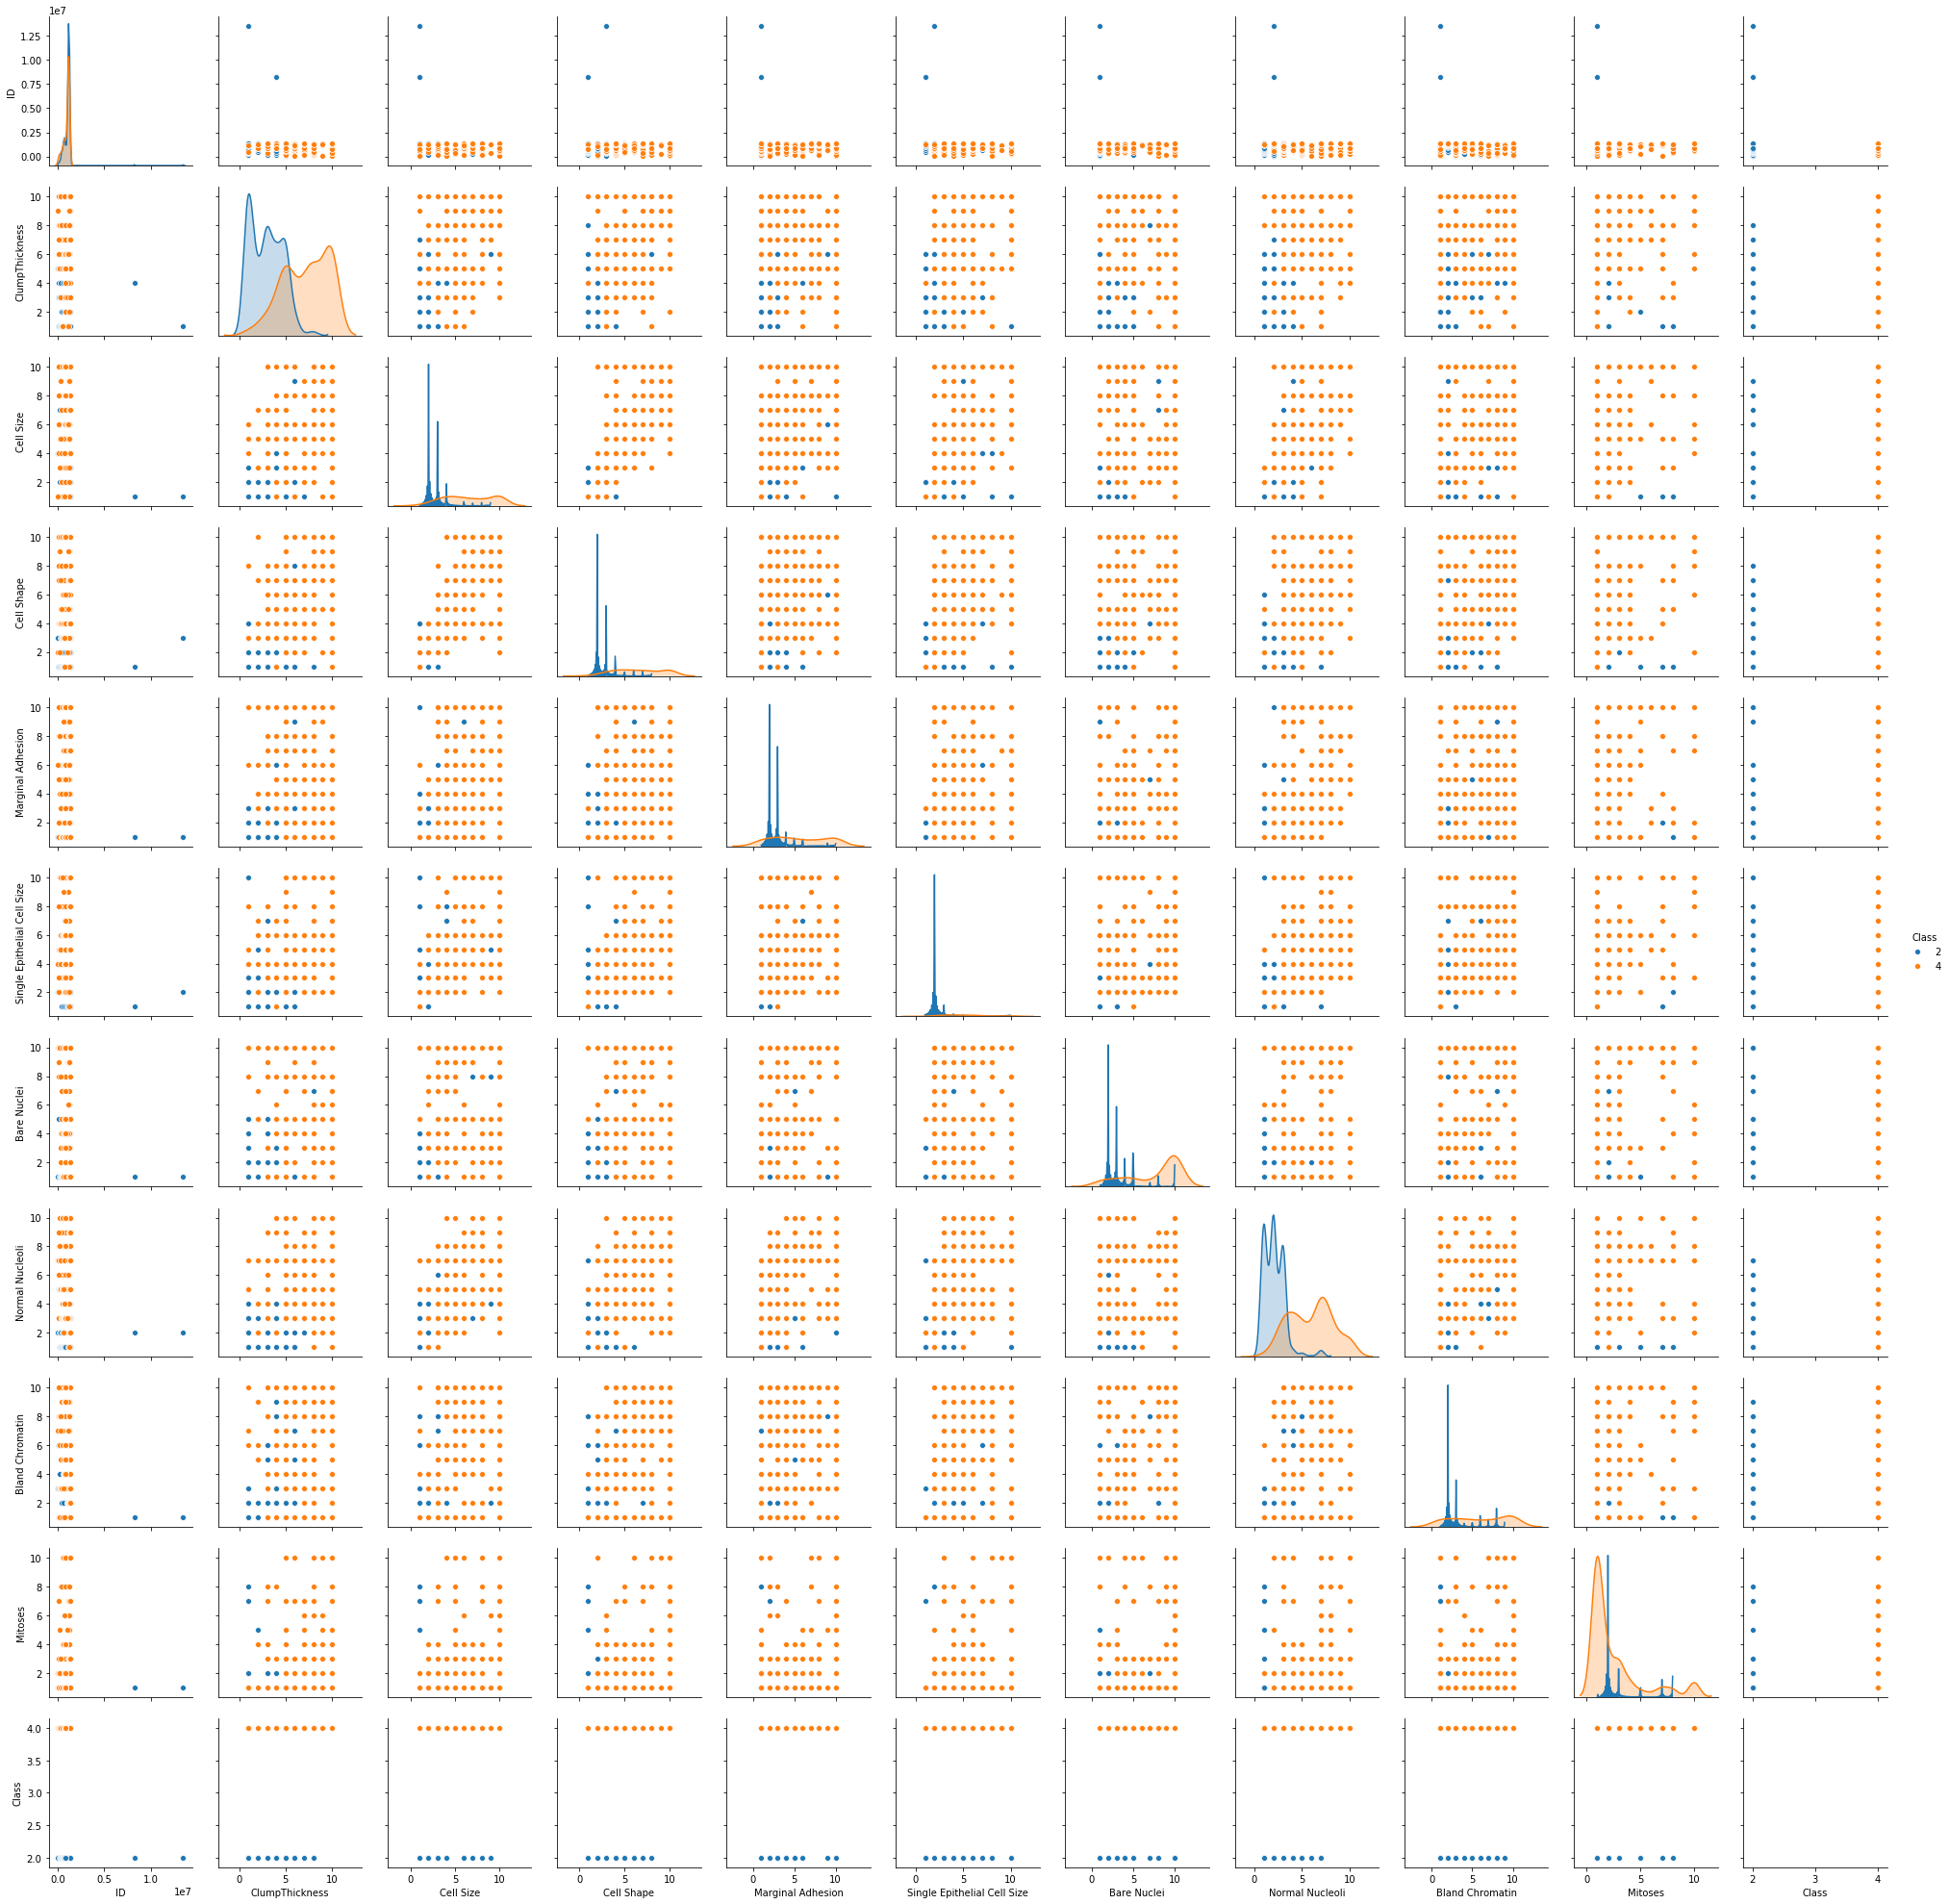

In [32]:
sns.pairplot(brcan_dt,hue="Class")

There attributes Mitoses,Normal Nucleoli, ClumpThickness shows decent separation in pairplots. These must be good attributes for modelling.

In [33]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

In [34]:
brcan_dt.dtypes

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int32
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

In [35]:
brcan_dt2 = brcan_dt.drop('ID',axis=1)

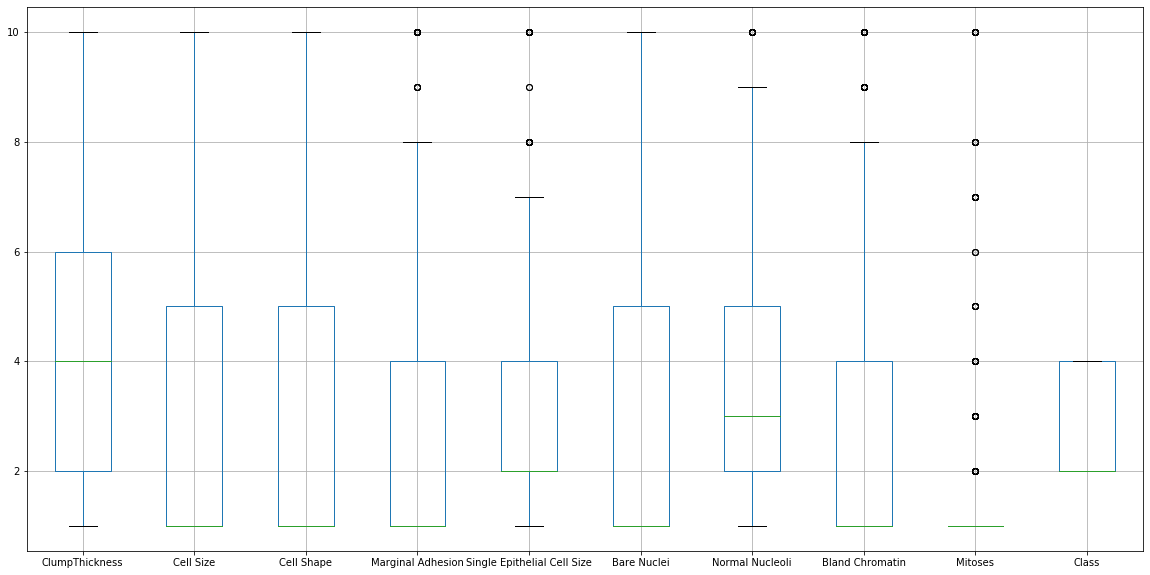

In [36]:
brcan_dt2.boxplot(figsize=(20,10))

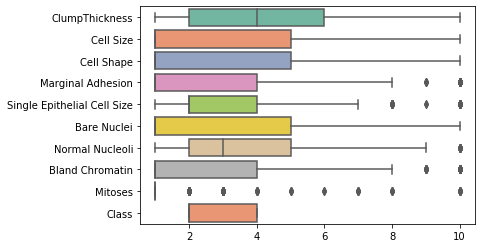

In [37]:
sns.boxplot(data=brcan_dt2, orient='h',palette='Set2')

We can identify that the attributes Marginal Adhesion, Single Epithelial Cell Size, Normal Nucleoli, Bland Chromatin and Mitoses have outliers from Box Plot.

In [38]:
pd.crosstab(brcan_dt['Mitoses'],brcan_dt['Class'])

Class,2,4
Mitoses,,
1,439,132
2,8,27
3,2,30
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [39]:
pd.crosstab(brcan_dt['Marginal Adhesion'],brcan_dt['Class'])

Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [40]:
pd.crosstab(brcan_dt['Single Epithelial Cell Size'],brcan_dt['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,29,42
4,7,41
5,5,34
6,2,39
7,3,9
8,2,18
9,0,2


In [41]:
pd.crosstab(brcan_dt['Normal Nucleoli'],brcan_dt['Class'])

Class,2,4
Normal Nucleoli,,
1,149,2
2,158,7
3,125,35
4,8,32
5,4,30
6,1,9
7,7,64
8,0,28
9,0,11


In [42]:
pd.crosstab(brcan_dt['Bland Chromatin'],brcan_dt['Class'])

Class,2,4
Bland Chromatin,,
1,396,40
2,30,6
3,12,30
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


From Cross Tab, we can identify that the attributes Marginal Adhesion, Single Epithelial Cell Size, Normal Nucleoli, Bland Chromatin and Mitoses have outliers and in order to remove outliers, we will change values to 4 for every ROW entry above 4(for example: Marginal Adhesion = 6 in original data will be updated to Marginal Adhesion = 4 for both the classes).

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [43]:
# We could see most of the outliers are now removed.

In [50]:
brcan_dt2['Marginal Adhesion']=np.where(brcan_dt2['Marginal Adhesion'] > 4,4,brcan_dt2['Marginal Adhesion'])
brcan_dt2['Single Epithelial Cell Size']=np.where(brcan_dt2['Single Epithelial Cell Size'] > 4,4,brcan_dt2['Single Epithelial Cell Size'])
brcan_dt2['Normal Nucleoli']=np.where(brcan_dt2['Normal Nucleoli'] > 4,4,brcan_dt2['Normal Nucleoli'])
brcan_dt2['Bland Chromatin']=np.where(brcan_dt2['Bland Chromatin'] > 4,4,brcan_dt2['Bland Chromatin'])
brcan_dt2['Mitoses']=np.where(brcan_dt2['Mitoses'] > 2,2,brcan_dt2['Mitoses'])

In [55]:
pd.crosstab(brcan_dt2['Mitoses'],brcan_dt['Class'])

Class,2,4
Mitoses,,
1,439,132
2,13,106


In [56]:
pd.crosstab(brcan_dt2['Marginal Adhesion'],brcan_dt['Class'])

Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,15,161


In [47]:
pd.crosstab(brcan_dt2['Single Epithelial Cell Size'],brcan_dt['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,29,42
4,20,172


In [52]:
pd.crosstab(brcan_dt2['Normal Nucleoli'],brcan_dt['Class'])

Class,2,4
Normal Nucleoli,,
1,149,2
2,158,7
3,125,35
4,20,194


In [53]:
pd.crosstab(brcan_dt2['Bland Chromatin'],brcan_dt['Class'])

Class,2,4
Bland Chromatin,,
1,396,40
2,30,6
3,12,30
4,14,162


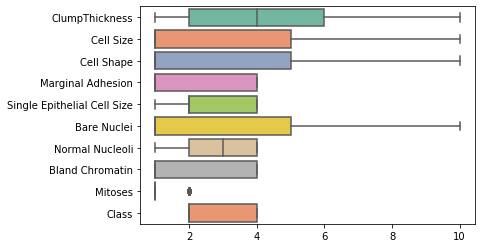

In [54]:
sns.boxplot(data=brcan_dt2, orient='h',palette='Set2')

We can see that outliers are removed

# Q6 Create a covariance matrix for identifying Principal components

In [48]:
# PCA
# Step 1 - Create covariance matrix


In [57]:
brcan_dt3 = brcan_dt2.drop('Class',axis=1)

In [58]:
brcan_dt3.shape

(690, 9)

In [59]:
brcan_dt3.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,4,4,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,4,1
4,4,1,1,3,2,1,3,1,1


In [79]:
brcan_dt3_y = brcan_dt2['Class']

In [81]:
brcan_dt3_y.shape

(690,)

In [60]:
cov_matrix=np.cov(brcan_dt3.T)

In [61]:
cov_matrix

array([[ 7.93762016,  5.51311079,  5.45212343,  2.02134999,  1.58362256,
         6.01908248,  1.74823416,  2.10597589,  0.4716266 ],
       [ 5.51311079,  9.25650701,  8.15558781,  2.84857281,  2.26463474,
         7.53352685,  2.31165941,  2.88911466,  0.56623125],
       [ 5.45212343,  8.15558781,  8.76659936,  2.70385562,  2.13964788,
         7.54129488,  2.21436865,  2.78168739,  0.51913296],
       [ 2.02134999,  2.84857281,  2.70385562,  1.68629183,  0.86946005,
         3.26875749,  0.8906628 ,  1.10828548,  0.20504407],
       [ 1.58362256,  2.26463474,  2.13964788,  0.86946005,  0.92942933,
         2.3775478 ,  0.69569424,  0.91140279,  0.16587787],
       [ 6.01908248,  7.53352685,  7.54129488,  3.26875749,  2.3775478 ,
        13.08315139,  2.63730044,  3.03232158,  0.63653057],
       [ 1.74823416,  2.31165941,  2.21436865,  0.8906628 ,  0.69569424,
         2.63730044,  1.2920658 ,  0.97184325,  0.16202225],
       [ 2.10597589,  2.88911466,  2.78168739,  1.10828548,  0

# Q7 Identify eigen values and eigen vector

In [49]:
# Step 2- Get eigen values and eigen vector

In [71]:
eigenval,eigenvec=np.linalg.eig(cov_matrix)

In [72]:
print(eigenvec)

[[-0.37843987 -0.30647896 -0.87135491  0.0206164  -0.02743371 -0.04649941
  -0.00487784 -0.00747814  0.01322824]
 [-0.48087559 -0.37176453  0.36319043  0.03091236  0.29259529 -0.62301088
  -0.08543697 -0.0286215  -0.12575259]
 [-0.47084283 -0.31640044  0.31336008 -0.01698488 -0.62762844  0.42310295
  -0.00227839  0.03763567  0.07320909]
 [-0.17674093  0.02819162  0.05893245 -0.00735089  0.36947509  0.1629591
  -0.13724141  0.16113599  0.86981221]
 [-0.13509349 -0.0207687   0.05001891  0.01018589  0.20432108  0.10953111
   0.95516778 -0.10733471  0.03320201]
 [-0.54871597  0.8153881  -0.03876674  0.01828136 -0.10851712 -0.1176541
  -0.02434818 -0.04606233 -0.0623132 ]
 [-0.14495042  0.00846178  0.01949325 -0.03123411  0.33141354  0.31672947
  -0.02639268  0.78810015 -0.38159049]
 [-0.17619012 -0.03993526  0.05194867  0.08220666  0.46673826  0.52721125
  -0.24507634 -0.57537429 -0.26644198]
 [-0.03490771 -0.00150366 -0.00907527 -0.9950404   0.04476038  0.00382967
  -0.01179099 -0.0770956

In [73]:
print(eigenval)

[33.65662175  4.38980202  3.55940169  0.09734036  0.94355395  0.78521316
  0.27302279  0.50511406  0.59634153]


# Q8 Find variance and cumulative variance by each eigen vector

In [74]:
print(eigenvec.var())

0.11085095884601355


In [76]:
print(eigenval.var())

104.87124957394731


In [75]:
tot = sum(eigenval)
var_exp = [( i /tot ) * 100 for i in sorted(eigenval, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 75.11563806  84.9129012   92.85685741  94.96270324  96.71516039
  98.04608941  99.17341483  99.78275349 100.        ]


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [77]:
brcan_dt3.dtypes

ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int32
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
dtype: object

In [78]:
from sklearn.decomposition import PCA

In [82]:
model = PCA()
model.fit(brcan_dt3)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [85]:
print(model.components_)

[[ 0.37843987  0.48087559  0.47084283  0.17674093  0.13509349  0.54871597
   0.14495042  0.17619012  0.03490771]
 [ 0.30647896  0.37176453  0.31640044 -0.02819162  0.0207687  -0.8153881
  -0.00846178  0.03993526  0.00150366]
 [ 0.87135491 -0.36319043 -0.31336008 -0.05893245 -0.05001891  0.03876674
  -0.01949325 -0.05194867  0.00907527]
 [-0.02743371  0.29259529 -0.62762844  0.36947509  0.20432108 -0.10851712
   0.33141354  0.46673826  0.04476038]
 [ 0.04649941  0.62301088 -0.42310295 -0.1629591  -0.10953111  0.1176541
  -0.31672947 -0.52721125 -0.00382967]
 [ 0.01322824 -0.12575259  0.07320909  0.86981221  0.03320201 -0.0623132
  -0.38159049 -0.26644198 -0.02214742]
 [ 0.00747814  0.0286215  -0.03763567 -0.16113599  0.10733471  0.04606233
  -0.78810015  0.57537429  0.07709561]
 [-0.00487784 -0.08543697 -0.00227839 -0.13724141  0.95516778 -0.02434818
  -0.02639268 -0.24507634 -0.01179099]
 [-0.0206164  -0.03091236  0.01698488  0.00735089 -0.01018589 -0.01828136
   0.03123411 -0.08220666

In [83]:
print(model.explained_variance_)
print (model.explained_variance_ratio_)
print (model.explained_variance_ratio_.cumsum())

[33.65662175  4.38980202  3.55940169  0.94355395  0.78521316  0.59634153
  0.50511406  0.27302279  0.09734036]
[0.75115638 0.09797263 0.07943956 0.02105846 0.01752457 0.01330929
 0.01127325 0.00609339 0.00217247]
[0.75115638 0.84912901 0.92856857 0.94962703 0.9671516  0.98046089
 0.99173415 0.99782753 1.        ]


In [87]:
df_components=pd.DataFrame(model.components_,columns=list(brcan_dt3))

# Q10 Find correlation between components and features

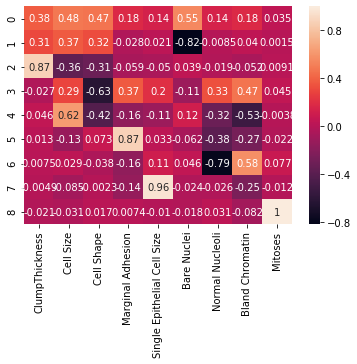

In [90]:
sns.heatmap(df_components,annot=True)

In [92]:
df_components.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
ClumpThickness,1.000000,-0.265929,0.109550,-0.187341,-0.291579,0.057112,0.225397,-0.017489,-0.248457
Cell Size,-0.265929,1.000000,0.077163,-0.131957,-0.205379,0.040228,0.158762,-0.012318,-0.175005
Cell Shape,0.109550,0.077163,1.000000,0.054360,0.084606,-0.016572,-0.065402,0.005075,0.072093
Marginal Adhesion,-0.187341,-0.131957,0.054360,1.000000,-0.144684,0.028339,0.111844,-0.008678,-0.123286
Single Epithelial Cell Size,-0.291579,-0.205379,0.084606,-0.144684,1.000000,0.044108,0.174075,-0.013507,-0.191884
Bare Nuclei,0.057112,0.040228,-0.016572,0.028339,0.044108,1.000000,-0.034096,0.002646,0.037585
Normal Nucleoli,0.225397,0.158762,-0.065402,0.111844,0.174075,-0.034096,1.000000,0.010441,0.148331
Bland Chromatin,-0.017489,-0.012318,0.005075,-0.008678,-0.013507,0.002646,0.010441,1.000000,-0.011509
Mitoses,-0.248457,-0.175005,0.072093,-0.123286,-0.191884,0.037585,0.148331,-0.011509,1.000000


In [89]:
df_components.head(10)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.378440,0.480876,0.470843,0.176741,0.135093,0.548716,0.144950,0.176190,0.034908
1,0.306479,0.371765,0.316400,-0.028192,0.020769,-0.815388,-0.008462,0.039935,0.001504
2,0.871355,-0.363190,-0.313360,-0.058932,-0.050019,0.038767,-0.019493,-0.051949,0.009075
3,-0.027434,0.292595,-0.627628,0.369475,0.204321,-0.108517,0.331414,0.466738,0.044760
4,0.046499,0.623011,-0.423103,-0.162959,-0.109531,0.117654,-0.316729,-0.527211,-0.003830
5,0.013228,-0.125753,0.073209,0.869812,0.033202,-0.062313,-0.381590,-0.266442,-0.022147
6,0.007478,0.028622,-0.037636,-0.161136,0.107335,0.046062,-0.788100,0.575374,0.077096
7,-0.004878,-0.085437,-0.002278,-0.137241,0.955168,-0.024348,-0.026393,-0.245076,-0.011791
8,-0.020616,-0.030912,0.016985,0.007351,-0.010186,-0.018281,0.031234,-0.082207,0.995040


In [93]:
model.explained_variance_ratio_.cumsum()

array([0.75115638, 0.84912901, 0.92856857, 0.94962703, 0.9671516 ,
       0.98046089, 0.99173415, 0.99782753, 1.        ])

Principle component 1 explains 75% of the variation in data 

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [94]:
jokes_dt=pd.read_csv(r'C:\Users\Admin\Desktop\Python\December_Internal_lab\jokes.csv')

In [95]:
jokes_dt.shape

(24983, 101)

In [96]:
jokes_dt.dtypes

NumJokes      int64
Joke1       float64
Joke2       float64
Joke3       float64
Joke4       float64
Joke5       float64
Joke6       float64
Joke7       float64
Joke8       float64
Joke9       float64
Joke10      float64
Joke11      float64
Joke12      float64
Joke13      float64
Joke14      float64
Joke15      float64
Joke16      float64
Joke17      float64
Joke18      float64
Joke19      float64
Joke20      float64
Joke21      float64
Joke22      float64
Joke23      float64
Joke24      float64
Joke25      float64
Joke26      float64
Joke27      float64
Joke28      float64
Joke29      float64
             ...   
Joke71      float64
Joke72      float64
Joke73      float64
Joke74      float64
Joke75      float64
Joke76      float64
Joke77      float64
Joke78      float64
Joke79      float64
Joke80      float64
Joke81      float64
Joke82      float64
Joke83      float64
Joke84      float64
Joke85      float64
Joke86      float64
Joke87      float64
Joke88      float64
Joke89      float64


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [99]:
Rating=jokes_dt.iloc[0:200,1:]

In [101]:
Rating.shape

(200, 100)

In [102]:
Rating.head(10)

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [103]:
Rating2=Rating.replace(99,0)

In [105]:
Rating2.head(10)

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,0.00,0.00,0.00,0.00,8.59,-9.85,7.72,8.79,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.33,0.00,0.00,0.00,0.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,0.00,4.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [108]:
Rating2.iloc[:,0].mean()

0.5300499999999997

In [109]:
Rating2.iloc[:,1].mean()

0.5938999999999995

In [110]:
Rating_mean=Rating2.mean()

In [111]:
Rating_mean.head()

Joke1    0.53005
Joke2    0.59390
Joke3    0.23765
Joke4   -0.70100
Joke5   -0.03790
dtype: float64

In [112]:
Rating_mean.sort_values(ascending=False).head(10)

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
dtype: float64

The Top 10 jokes and there respective ratings are mentioned above